Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\vikne\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\vikne\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 108s 643ms/step - accuracy: 0.7954 - loss: 0.4595 - val_accuracy: 0.6250 - val_loss: 0.9154
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 96s 585ms/step - accuracy: 0.9205 - loss: 0.1925 - val_accuracy: 0.6875 - val_loss: 0.8648
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 95s 579ms/step - accuracy: 0.9492 - loss: 0.1334 - val_accuracy: 0.8125 - val_loss: 0.4826
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 93s 568ms/step - accuracy: 0.9522 - loss: 0.1260 - val_accuracy: 0.7500 - val_loss: 0.5790
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 623ms/step - accuracy: 0.9639 - loss: 0.0959 - val_accuracy: 0.7500 - val_loss: 0.6577
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 646ms/step - accuracy: 0.9692 - loss: 0.0845 - val_accuracy: 0.7500 - val_loss: 0.5050
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 579ms/step - accuracy: 0.9724 - loss: 0.0729 - val_accuracy: 0.9375 - val_loss: 0.1758
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 84s 516ms/step - accuracy: 0.9788 - loss

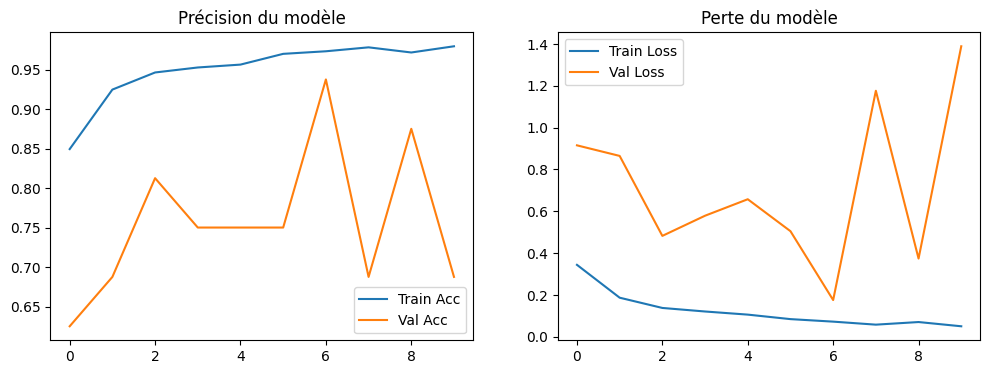

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# 1. Charger et prétraiter les données
train_dir = r"C:\Users\vikne\Documents\Master 1\S8\Intelligence Artificielle\Project\Zoidberg2.0_Computer-Aided-Diagnosis\chest_xray\train"
val_dir = r"C:\Users\vikne\Documents\Master 1\S8\Intelligence Artificielle\Project\Zoidberg2.0_Computer-Aided-Diagnosis\chest_xray\val"
test_dir = r"C:\Users\vikne\Documents\Master 1\S8\Intelligence Artificielle\Project\Zoidberg2.0_Computer-Aided-Diagnosis\chest_xray\test"

img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=img_size, batch_size=batch_size, class_mode="binary"
)
val_generator = datagen.flow_from_directory(
    val_dir, target_size=img_size, batch_size=batch_size, class_mode="binary"
)
test_generator = datagen.flow_from_directory(
    test_dir, target_size=img_size, batch_size=batch_size, class_mode="binary", shuffle=False
)

# 2. Définir le modèle avec Max Pooling très haut
def create_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
        layers.MaxPooling2D(4, 4),  # MaxPooling avec un grand noyau
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(4, 4),  # MaxPooling avec un grand noyau
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D(4, 4),  # MaxPooling avec un grand noyau
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ])
    
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

# 3. Entraînement du modèle
model = create_model()
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# 4. Évaluation et calcul des métriques
test_loss, test_acc = model.evaluate(test_generator)
print(f"Précision sur le test: {test_acc:.2f}")

# 5. Affichage des courbes d'entraînement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Acc")
plt.plot(history.history["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Précision du modèle")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Perte du modèle")
plt.show()
